In [10]:
#Now lets optimize both our slope and intercept

from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score



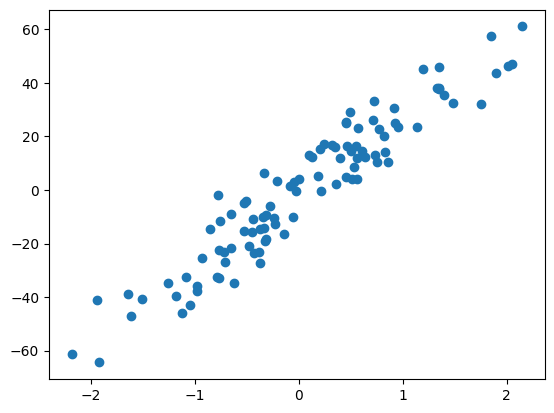

In [2]:
X,y =  make_regression(n_samples=100, n_features=1,n_informative=1, n_targets=1, noise=10, random_state=13) 
plt.scatter(X,y)

In [ ]:
lr = LinearRegression()
lr.fit(X,y)
print("Slope: ", lr.coef_[0])
print("Intercept: ", lr.intercept_)


Slope:  27.718199765142998
Intercept:  -1.1473722793384897
Score:  0.9040006763949722


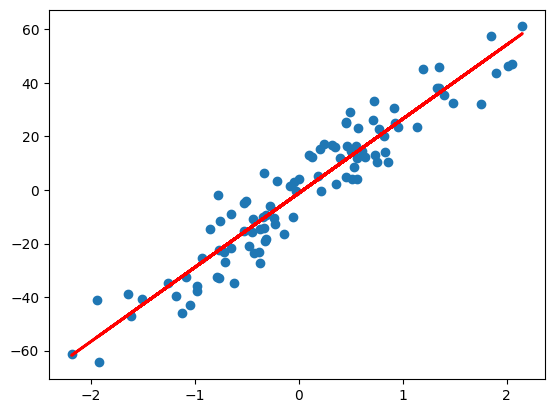

In [27]:
y_pre = lr.predict(X)
plt.scatter(X,y)
plt.plot(X, y_pre, color='red', linewidth=2)


In [15]:
np.mean(cross_val_score(lr, X, y, cv=10, scoring='r2'))


np.float64(0.8813519260036552)

In [ ]:
class GDregressor:
    
    def __init__(self, learning_rate=0.1, epoches=100):
        self.lr = learning_rate
        self.epoches = epoches
        self.m = 100
        self.b = -120

    def fit(self, X, y):
        for i in range(self.epoches):
            loss_slope_b = -2 * np.sum(y - self.m * X.ravel() - self.b)
            self.b = self.b - self.lr * loss_slope_b
            loss_slope_m = -2 * np.sum((y - (self.m * X.ravel() + self.b)) * X.ravel())
            self.m = self.m - self.lr * loss_slope_m
        print("Updated Slope: ", self.m)
        print("Updated Intercept: ", self.b)
        return self

    def predict(self, X):
        return self.m * X.ravel() + self.b



gd = GDregressor(0.01, 1000)
gd.fit(X, y)
y_pred = gd.predict(X)


Updated Slope:  27.718199765142998
Updated Intercept:  -1.1473722793384904


array([-20.89355896, -13.26426289, -13.72457143,  25.26337694,
         5.4456188 ,  22.72385663,  -7.89193794,   3.97899652,
       -21.13218526, -13.06334547,  54.71092112,   9.86344216,
         4.61247111,  -7.58979903, -22.45232959,  11.41336869,
        16.58905952,   8.81821571, -45.91525745,  47.3384611 ,
       -23.01672769, -15.33812303, -26.87915352,  58.45737238,
        -6.89473264, -46.58009088, -10.53326069, -10.07606015,
       -14.49012134, -15.6485425 ,  18.86419941,  20.08230319,
        11.42230578, -36.1168179 , -61.77027033, -34.00504764,
         4.87999626,  35.72661796, -31.28208879,  14.43751001,
       -43.0807154 ,  -1.21359177,  -8.85676037,  11.37605238,
        31.85683433,  24.41834707,  21.44283422, -18.35981172,
        24.17987511,  30.40517053,  39.83913438, -19.19348582,
       -11.56719686, -22.61955383,  12.74325137,  36.27740565,
        19.0637819 ,  -3.41060642, -24.82267729,  11.75982841,
        -2.38091749,  -2.7420665 ,  51.31603464, -30.12

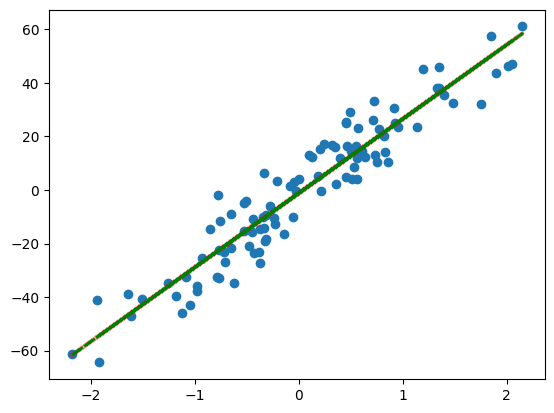

In [30]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red', linewidth=3, alpha =0.4)
plt.plot(X,y_pred, color='green', linewidth=2, linestyle='--')